# Analytical correlation function for near neighbor

### Function definitions

In [10]:
import sys 
# sys.path
# sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [11]:
import numpy as np
import scipy
import style
from scipy.sparse import csr_matrix, coo_matrix
from scipy.linalg import eig as get_eigs
import math
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure

In [12]:
def theta_funct(J: float, h: float, T: float):
    """ Return the theta angule function for one-dimensional Ising chain with near neighbor interaction 
    
    Args:
        J: A float number. Interchange energy
        h: A float number. Magnetic field
        T: A float number. Temperature

    Returns:
        A float number

    Raises:
    """
    return math.atan((math.exp(-2*J/T))/(math.sinh(h/T)))

def lambda_p(J: float, h: float, T: float):
    """ Return the theta angule function for one-dimensional Ising chain with near neighbor interaction 
    
    Args:
        J: A float number. Interchange energy
        h: A float number. Magnetic field
        T: A float number. Temperature

    Returns:
        A float number

    Raises:
    """
    return math.exp(J/T)*math.cosh(h/J)+math.sqrt(math.exp(-2*J/T)+math.exp(2*J/T)*(math.sinh(h/T)**2))

def lambda_m(J: float, h: float, T: float):
    """ Return the theta angule function for one-dimensional Ising chain with near neighbor interaction 
    
    Args:
        J: A float number. Interchange energy
        h: A float number. Magnetic field
        T: A float number. Temperature

    Returns:
        A float number

    Raises:
    """
    return math.exp(J/T)*math.cosh(h/J)-math.sqrt(math.exp(-2*J/T)+math.exp(2*J/T)*(math.sinh(h/T)**2))

def cor_funct_two_neighbors(J: float, h: float, T: float, r: int):
    """ Return the theta angule function for one-dimensional Ising chain with near neighbor interaction 
    
    Args:
        J: A float number. Interchange energy
        h: A float number. Magnetic field
        T: A float number. Temperature
        r: An int number. Number of distance between spins

    Returns:
        A float number

    Raises:
    """
    return (math.cos(theta_funct(J,h,T))**2 + ((lambda_m(J,h,T)/lambda_p(J,h,T))**r)*(math.sin(theta_funct(J,h,T))**2))

def lenght_corr_two_neighbors(J: float, h: float, T: float, r: int):
    """ Return the theta angule function for one-dimensional Ising chain with near neighbor interaction 
    
    Args:
        J: A float number. Interchange energy
        h: A float number. Magnetic field
        T: A float number. Temperature
        r: An int number. Number of distance between spins

    Returns:
        A float number

    Raises:
    """
    return -(r/math.log(cor_funct_two_neighbors(J,h,T,r)))

## Plots

In [13]:
jota = 1
mag_field = 1
tem = 1
theta = theta_funct(jota,mag_field,tem)
eigen_p = np.array([math.cos(theta/2),math.sin(theta/2)])
eigen_m = np.array([-math.sin(theta/2),math.cos(theta/2)])

Text(0, 0.5, '$C(r)$')

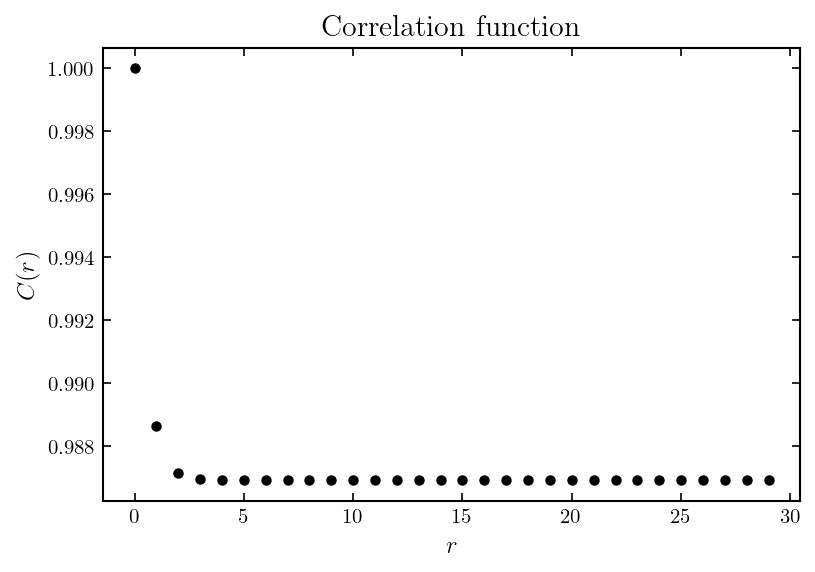

In [16]:
# Load the default style.
# style.use("default")
# rcParams["text.usetex"] = False

# fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
# grid_spec = GridSpec(3, 1)

x = np.arange(0,30,1)
y = []
for r in x:
    y.append(cor_funct_two_neighbors(jota,mag_field,tem,r))
pyplot.plot(x, y, 'o', color='black')
# pyplot.semilogy(x, y, 'o', color='black')
pyplot.rc('text', usetex=True)
pyplot.rc('font', family='serif')
# text_figure = '$k_BT/J={}$, $h/J={}$'.format(tem,mag_field)
# pyplot.text(10, 0.6, text_figure,style='italic',
#         bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})
pyplot.title('Correlation function')
pyplot.xlabel('$r$')
pyplot.ylabel('$C(r)$')

C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, 'C(r)')

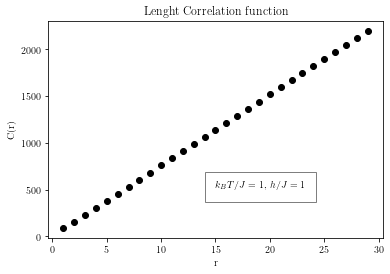

In [8]:
x = np.arange(0,30,1)
y = []
tem = 1
for r in x:
    y.append(lenght_corr_two_neighbors(jota,mag_field,tem,r))
pyplot.plot(x, y, 'o', color='black')
pyplot.rc('text', usetex=True)
pyplot.rc('font', family='serif')
pyplot.title('Lenght Correlation function')
text_figure = '$k_BT/J={}$, $h/J={}$'.format(tem,mag_field)
pyplot.text(15, 500, text_figure,style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})
pyplot.xlabel('r')
pyplot.ylabel('C(r)')

# list_non_img_eigen = A_eigenvalues.imag == 0
# if False in list_non_img_eigen:
#     print('all is ok')